In [27]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

# Houses Kaggle Competition (bis 🔥) 

[<img src='https://github.com/lewagon/data-images/blob/master/ML/kaggle-batch-challenge.png?raw=true' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Let's re-use our previous pipeline build in module `05-07-Ensemble-Methods` and improve final predictions using a Neural Network!

# Re-use already-built preprocessing

### Load data

In [50]:
# Let's load our training dataset
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

# You don't have access to y_yest! Only Kaggle has it.
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

print(X.shape, y.shape, X_test.shape)

(1460, 80) (1460,) (1459, 80)


### Import preprocessor

You will find in `utils/preprocessor.py` the data-preprocessing pipeline that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py`

In [54]:
from utils.preprocessor import create_preproc
preproc = create_preproc(X)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x1468e7af0>))])

❓ Fit the preprocessor you your train set and create your feature matrix `X_preproc` that will be used by the Neural Network

In [164]:
# fit the preprocessor on the train set
preproc.fit(X, y)

# create 
X_preproc = preproc.transform(X)
X_preproc.shape

(1460, 162)

# Your prediction in Keras

This is your first **regression** task with Keras! 
- The cell below contains compiler and fit hyper-parameters we recommend you to start with.
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize `rmsle` (Root Mean Square Log Error). As you can see, we have been able to specify `msle` direcly as loss-function with Keras! Just remember to take square-root of your loss results to read your rmsle metric.
- The best boosted-tree `rmsle` score to beat is around **0.13**

❓ **Question** ❓
- Your responsibility is to build the best model architecture, and to control the epoch number to avoid overfitting.
- We recommand you to create a train/val split upfront to visually control the validation loss thanks to `plot_history`

In [132]:
# Create a train val split here

In [ ]:
def initialize_model():

    ### YOUR MODEL ARCHITECTURE HERE
    # model = ...

    
    # Recommended compilator
    model.compile(optimizer='adam',
                  loss='msle', # directly optimize for the squared log error!
    return model

model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, # Play with this until your validation loss overfit
                    batch_size=16, # Keep batch size to 16 today
                    verbose=0)

In [165]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('MSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

#### SOLUTION BELOW

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_preproc,y,test_size=0.3, shuffle=True)

In [167]:
from tensorflow.keras import Sequential, layers

In [227]:
def initialize_model(X):

    # Model architecture
    model = Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=X.shape[1]))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    
    # Recommended compilator hyperparams
    model.compile(optimizer='adam',
                  loss='msle', # we directly optimize for the kaggle's metric!
    ) 
    
    return model

In [228]:
model = initialize_model(X_train)
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 20)                3260      
_________________________________________________________________
dense_111 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_112 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_113 (Dense)            (None, 20)                320       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 21        
Total params: 4,156
Trainable params: 4,156
Non-trainable params: 0
_________________________________________________________________


In [229]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), # create a val set within your train set
                    epochs=500, # Play with this until your validation loss overfit
                    batch_size=16, # Keep batch size to 16 today
                    verbose=1)

Epoch 1/500
69/69 [==============================] - 0s 3ms/step - loss: 120.8843 - val_loss: 78.1758
Epoch 2/500
69/69 [==============================] - 0s 1ms/step - loss: 71.0888 - val_loss: 53.4854
Epoch 3/500
69/69 [==============================] - 0s 1ms/step - loss: 49.5915 - val_loss: 39.0685
Epoch 4/500
69/69 [==============================] - 0s 1ms/step - loss: 36.5644 - val_loss: 29.2165
Epoch 5/500
69/69 [==============================] - 0s 1ms/step - loss: 27.5204 - val_loss: 22.8239
Epoch 6/500
69/69 [==============================] - 0s 1ms/step - loss: 21.6336 - val_loss: 18.3738
Epoch 7/500
69/69 [==============================] - 0s 1ms/step - loss: 17.7563 - val_loss: 15.0812
Epoch 8/500
69/69 [==============================] - 0s 2ms/step - loss: 14.5296 - val_loss: 12.5518
Epoch 9/500
69/69 [==============================] - 0s 1ms/step - loss: 12.0842 - val_loss: 10.5517
Epoch 10/500
69/69 [==============================] - 0s 2ms/step - loss: 10.1986 - val_lo

Epoch 83/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0799 - val_loss: 0.0756
Epoch 84/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0944 - val_loss: 0.0748
Epoch 85/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0827 - val_loss: 0.0740
Epoch 86/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0771 - val_loss: 0.0732
Epoch 87/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0816 - val_loss: 0.0723
Epoch 88/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0845 - val_loss: 0.0714
Epoch 89/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0806 - val_loss: 0.0706
Epoch 90/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0768 - val_loss: 0.0696
Epoch 91/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0779 - val_loss: 0.0688
Epoch 92/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0677


69/69 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0206
Epoch 165/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 166/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0203
Epoch 167/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0198
Epoch 168/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.0198
Epoch 169/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0197
Epoch 170/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 171/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0195
Epoch 172/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0201
Epoch 173/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0191
Epoc

69/69 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0144
Epoch 246/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0143
Epoch 247/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0147
Epoch 248/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0146
Epoch 249/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 250/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0144
Epoch 251/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0140
Epoch 252/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 253/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0141
Epoch 254/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0142
Epoc

69/69 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0146
Epoch 327/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0145
Epoch 328/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0147
Epoch 329/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0146
Epoch 330/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0147
Epoch 331/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0147
Epoch 332/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0147
Epoch 333/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0147
Epoch 334/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0152
Epoch 335/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0148
Epoc

69/69 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0165
Epoch 408/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0167
Epoch 409/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0166
Epoch 410/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0167
Epoch 411/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0168
Epoch 412/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0166
Epoch 413/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0167
Epoch 414/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0167
Epoch 415/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0176
Epoch 416/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0171
Epoc

69/69 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0195
Epoch 489/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0191
Epoch 490/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0190
Epoch 491/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0189
Epoch 492/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0191
Epoch 493/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0191
Epoch 494/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0191
Epoch 495/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0190
Epoch 496/500
69/69 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0190
Epoch 497/500
69/69 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0191
Epoc

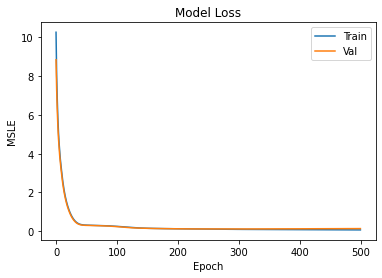

In [230]:
plot_history(history)

In [231]:
# val RMSE at last epoch
model.evaluate(X_val, y_val)**0.5

12/12 [==============================] - 0s 549us/step - loss: 0.0194


0.13920540325010203

In [232]:
# Mininimal val RMSE reached amongst all epochs
min(history.history['val_loss'])**0.5

0.11681289403521361

❓ **Question** ❓
- Are you satisfied with your score?
- Before you publish it, ask yourself if you can trust it entirely? Has it been cross-validated? 
- Feel free to cross-validate it manually with a for loop in python if you want before submitting to Kaggle

In [264]:
def evaluate_model(X,y,train_index,val_index):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = initialize_model(X_train)
    history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=500,
                    batch_size=16,
                    verbose=0)
    return pd.DataFrame({
        'rmsle_final_epoch': [model.evaluate(X_val, y_val)**0.5],
        'rmsle_min': [min(history.history['val_loss'])**0.5]
    })

In [265]:
from sklearn.model_selection import KFold
cv = 5
kf = KFold(n_splits=cv, shuffle=True)

In [257]:
results = []

for train_index, val_index in kf.split(X_preproc):
    results.append(evaluate_model(X_preproc, y, train_index, val_index))
    
pd.concat(results, axis=0)

12/12 [==============================] - 0s 711us/step - loss: 9.6846


**BONUS SOLUTION**: Multiprocessing using [dask](https://docs.dask.org/en/latest/delayed.html) and 8 CPU cores to mimic sklearn's `n_jobs=-1`

In [266]:
# pip install --quiet dask
from dask import delayed

f = delayed(evaluate_model)

results = delayed(
    [f(X_preproc, y, train_index, val_index) 
     for (train_index, val_index) in kf.split(X_preproc)]
).compute(
    scheduler='processes',
    num_workers=8)

pd.concat(results, axis=0)

,rmsle,rmsle_min
0,0.145304,0.137357
0,0.141892,0.123132
0,0.139644,0.132616
0,0.137125,0.135550
0,0.167325,0.156293


TODO: multiprocessing with default python libray
References [here](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8) and [here](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [ ]:
# import multiprocessing as mp
# pool = mp.Pool(processes=2) #mp.cpu_count()-1)

# results = []
# def log_result(x):
#     results.append(x)
    
# for train_index, val_index in kf.split(X_preproc):
#     pool.apply_async(
#         evaluate_model,
#         args=(X, y, train_index, val_index),
#         callback = log_result)

# # Close the pool for new tasks
# pool.close()

# # Wait for all tasks to complete at this point
# pool.join()

# result = pd.concat(results, axis=0)

# 🏅FINAL SUBMISSION

Predict the house prices of your test set and submit results to kaggle! Be carefull with the format

In [156]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [157]:
X_test_preproc = preproc.transform(X_test)
predictions = model.predict(X_test_preproc)
predictions

array([[112746.77],
       [149050.45],
       [180118.2 ],
       ...,
       [168149.66],
       [117278.93],
       [205957.58]], dtype=float32)

In [163]:
results = pd.concat([X_test["Id"], pd.Series(predictions[:,0], name="SalePrice")], axis=1)
results

,Id,SalePrice
0,1461,112746.773438
1,1462,149050.453125
2,1463,180118.203125
3,1464,193795.671875
4,1465,202063.234375
...,...,...
1454,2915,80209.367188
1455,2916,73900.828125
1456,2917,168149.656250
1457,2918,117278.929688


In [ ]:
# Export to Kaggle format submission and submit it online!
results.to_csv("submission_final.csv", header=True, index=False)